In [3]:
import glob
import os

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline




Concatenacion de todas la tablas de jornada y temporada

In [51]:
folder_path = "C:/Users/Alejandro/PycharmProjects/Practicas/data"

# Lee todos los archivos Excel en la carpeta especificada data
all_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

data_frames = []

# Lee cada archivo Excel, agrega columnas de temporada y jornada, y almacena su contenido en la lista
for file in all_files:
    # Extrae información de temporada y jornada del nombre del archivo
    file_name = os.path.basename(file)
    jornada, temporada = file_name.split('_')  # Asumiendo que el nombre del archivo contiene "temporada_jornada.xlsx"

    df = pd.read_excel(file)

    # Agrega columnas de temporada y jornada
    df['Temporada'] = temporada.split('Stats')[0]
    df['Jornada'] = jornada

    data_frames.append(df)

# Concatena todos los DataFrames en uno
concatenated_df = pd.concat(data_frames, ignore_index=True)

# Guarda el DataFrame concatenado en un nuevo archivo Excel
concatenated_df.to_csv("all_seasons_data.csv", index=False)

     p    wp   ap  playerId  tid                  nm  wn  tp  mins  g  ...  \
0  0.0  14.0  0.0        79    3       Athletic Club   0  14    90  1  ...   
1  0.0  13.0  0.0       793    2  Atlético de Madrid   0  13    89  1  ...   
2  0.0  13.0  0.0       268   16       Real Sociedad   0  13    74  0  ...   
3  0.0  12.0  0.0        81    3       Athletic Club   0  12    70  1  ...   
4  0.0  12.0  0.0       576   21           D. Alavés   0  12    72  1  ...   

   blspp  currp  pss                  tn   avg  ip    ren         slug  \
0    188     99  NaN       Athletic Club  14.0   1   0.70         capa   
1     57    207  NaN  Atlético de Madrid  13.0   2  62.74     carrasco   
2    107    141  NaN       Real Sociedad  13.0   3   2.96      januzaj   
3    170    148  NaN       Athletic Club  12.0   4   6.68      muniain   
4    178    136  NaN           D. Alavés  12.0   5   1.98  lucas-perez   

    Temporada  Jornada  
0  Season2020   Week10  
1  Season2020   Week10  
2  Season20

In [4]:
df = pd.read_csv("all_seasons_data.csv", delimiter=',')

df.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,blspp,currp,pss,tn,avg,ip,ren,slug,Temporada,Jornada
0,0.0,14.0,0.0,79,3,Athletic Club,0,14,90,1,...,188,99,NaN,Athletic Club,14.0,1,0.70,capa,Season2020,Week10
1,0.0,13.0,0.0,793,2,Atlético de Madrid,0,13,89,1,...,57,207,NaN,Atlético de Madrid,13.0,2,62.74,carrasco,Season2020,Week10
2,0.0,13.0,0.0,268,16,Real Sociedad,0,13,74,0,...,107,141,NaN,Real Sociedad,13.0,3,2.96,januzaj,Season2020,Week10
3,0.0,12.0,0.0,81,3,Athletic Club,0,12,70,1,...,170,148,NaN,Athletic Club,12.0,4,6.68,muniain,Season2020,Week10
4,0.0,12.0,0.0,576,21,D. Alavés,0,12,72,1,...,178,136,NaN,D. Alavés,12.0,5,1.98,lucas-perez,Season2020,Week10


In [5]:
def top_10_players(season):
    seasons = df[df['Temporada'] == season]

    average_salary_by_jornada  = seasons.groupby('Jornada')['mv'].mean()

    overall_average_salary = average_salary_by_jornada.mean()

    top_players = seasons.groupby('nn').filter(lambda x: x['mv'].mean() > overall_average_salary)

    top_10_players = top_players.groupby('nn')['mv'].mean().nlargest(10)
    print("Top 10 players of the " + season + " season: ")
    print(top_10_players)
    print()

In [6]:
for i in range(df['Temporada'].nunique()):
    top_10_players(df['Temporada'].unique()[i])

Top 10 players of the Season2020 season: 
nn
Messi              96566849.0
Suárez             89200848.0
Benzema            88875881.0
Marcos Llorente    85071725.0
Carrasco           81561288.0
Gerard             75062516.0
De Jong            62892577.0
Modric             62497463.0
Aspas              61660389.0
Casemiro           61183752.0
Name: mv, dtype: float64

Top 10 players of the Season2021 season: 
nn
Vinícius Jr      98666798.0
Benzema          95114515.0
Dembélé          76084493.0
Fekir            68843452.0
Aubameyang       55491521.0
Muniain          55012949.0
Aspas            52110270.0
Guedes           46092739.0
Soler            45098148.0
Ronald Araújo    44055677.0
Name: mv, dtype: float64

Top 10 players of the Season2022 season: 
nn
Vinícius Jr.    124312119.0
Lee KangIn      122918922.0
Griezmann       114619264.0
Kubo            112633138.0
Rodrygo         107333686.0
Lewandowski      98267121.0
De Jong          93504895.0
Benzema          91915100.0
Álex Bald

In [7]:
#convert jornada to int and sort by jornada
df['Jornada'] = df['Jornada'].str.split('Week').str[1].astype(int)
df['Temporada'] = df['Temporada'].str.split('Season').str[1].astype(int)

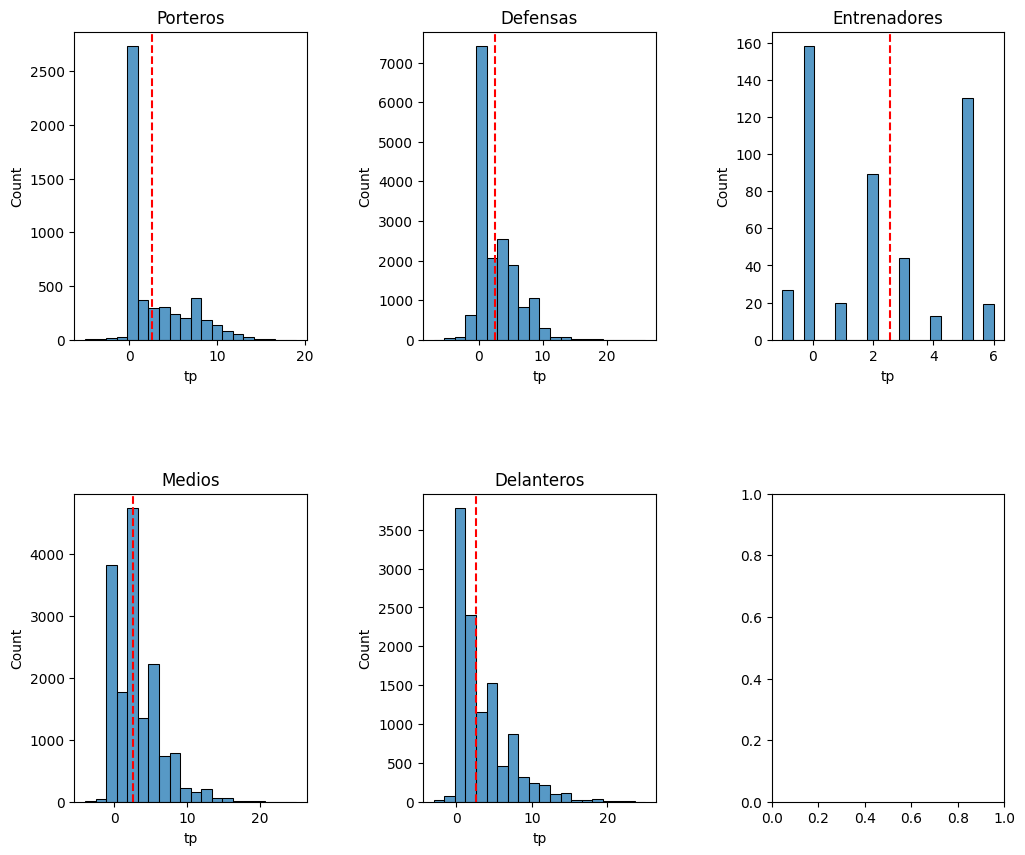

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)


axes[0,0].set_title('Porteros')
sns.histplot(df[df['pid'] == 1]['tp'], bins=20, ax=axes[0, 0])
axes[0,0].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[0,1].set_title('Defensas')
sns.histplot(df[df['pid'] == 2]['tp'], bins=20, ax=axes[0, 1])
axes[0,1].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[0,2].set_title('Entrenadores')
sns.histplot(df[df['pid'] == 5]['tp'], bins=20, ax=axes[0, 2])
axes[0,2].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[1,0].set_title('Medios')
sns.histplot(df[df['pid'] == 3]['tp'], bins=20, ax=axes[1, 0])
axes[1,0].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[1,1].set_title('Delanteros')
sns.histplot(df[df['pid'] == 4]['tp'], bins=20, ax=axes[1, 1])
axes[1,1].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')


plt.show()


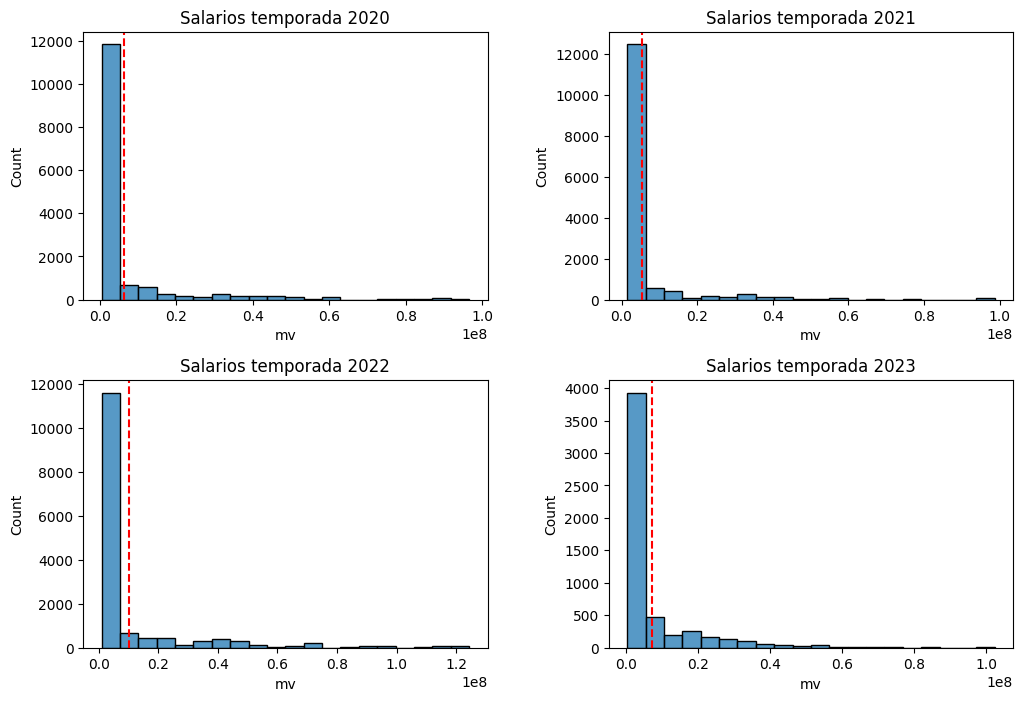

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)


axes[0,0].set_title('Salarios temporada 2020')
sns.histplot(df[df['Temporada'] == 2020]['mv'], bins=20, ax=axes[0, 0])
axes[0,0].axvline(df[df['Temporada'] == 2020]['mv'].mean(), color='red', linestyle='--')

axes[0,1].set_title('Salarios temporada 2021')
sns.histplot(df[df['Temporada'] == 2021]['mv'], bins=20, ax=axes[0, 1])
axes[0,1].axvline(df[df['Temporada'] == 2021]['mv'].mean(), color='red', linestyle='--')

axes[1,0].set_title('Salarios temporada 2022')
sns.histplot(df[df['Temporada'] == 2022]['mv'], bins=20, ax=axes[1, 0])
axes[1,0].axvline(df[df['Temporada'] == 2022]['mv'].mean(), color='red', linestyle='--')


axes[1,1].set_title('Salarios temporada 2023')
sns.histplot(df[df['Temporada'] == 2023]['mv'], bins=20, ax=axes[1, 1])
axes[1,1].axvline(df[df['Temporada'] == 2023]['mv'].mean(), color='red', linestyle='--')



plt.show()


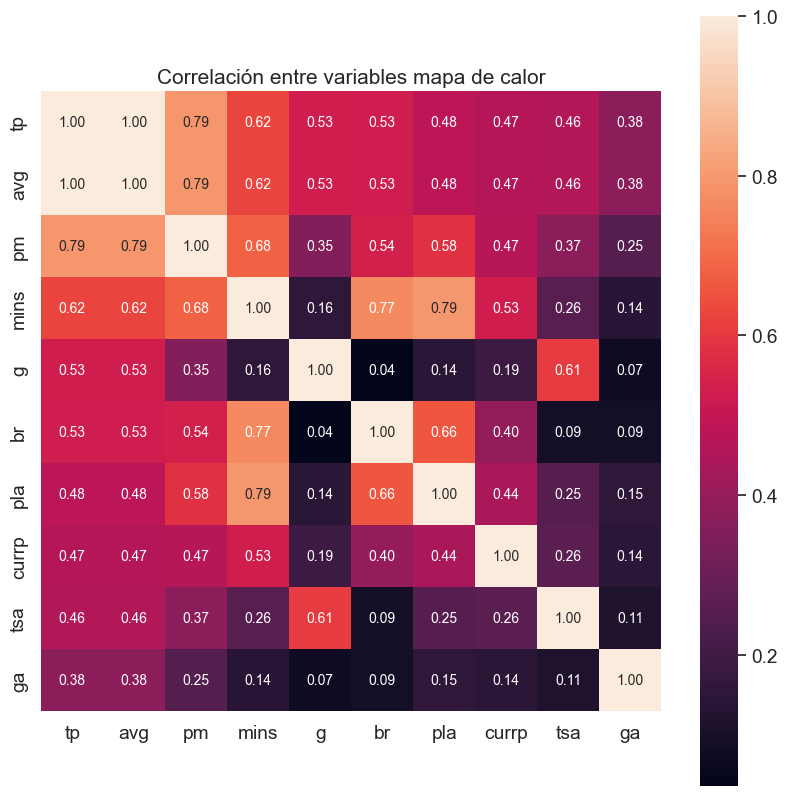

In [14]:
stats_corr = df.select_dtypes(include=[np.number]).corr()


k = 10 
cols = stats_corr.nlargest(k, 'tp')['tp'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(10,10))
plt.title('Correlación entre variables mapa de calor')

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
df['tp'].describe()

count    50179.000000
mean         2.936487
std          3.299052
min         -7.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         26.000000
Name: tp, dtype: float64

Text(0.5, 1.0, 'Histogram of total points')

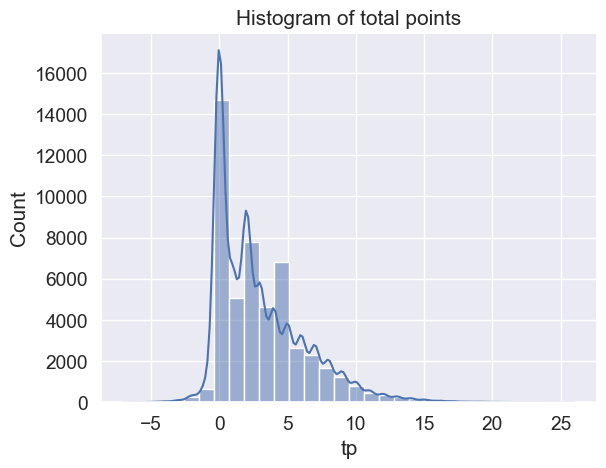

In [16]:
g = sns.histplot(df['tp'], bins=30, kde=True)
g.set_title('Histogram of total points')

Text(0.5, 1.0, 'Boxplot of total points')

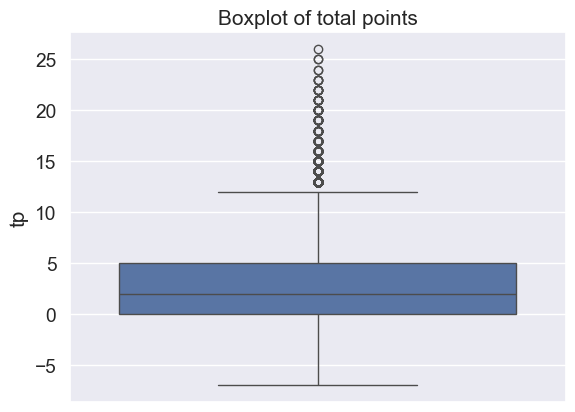

In [17]:
g = sns.boxplot(df['tp'])
g.set_title('Boxplot of total points')